In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from statannotations.Annotator import Annotator
sns.set_style("whitegrid")

In [19]:
# Import abundance tables
AbundanceStarts = pd.read_csv('../../results/CharacterizationOfQuantseqGroups/QuantificationOfBinding3UtrStartsMergedReplicates/QuantifiedClipSignalInSlamseq3Utrs.tsv', sep='\t')
AbundanceEnds = pd.read_csv('../../results/CharacterizationOfQuantseqGroups/QuantificationOfBinding3PendsMergedReplicates/QuantifiedClipSignalInSlamseq3Utrs.tsv', sep='\t')

outpath = '../../results/CharacterizationOfQuantseqGroups/AnalysisOfAbundanceAndRbpRelationships/'
os.makedirs(outpath, exist_ok=True)

In [20]:
AbundanceEnds.head(2)

,chrom,start,end,name,score,strand,stable_gene_id,minXlCount,Mean TPM S200A_FCL,Mean TPM S200WT_2iL,...,Mean TPM KO_FCL,Sample,CPM,librarysize,Protein,Condition,Mean TPM,CPM per TPM,gene_name,normalizationCoefficient
0,chr1,9617379,9617680,DOWN,-1.120703,+,ENSMUSG00000061024,10,31.349880,43.304011,...,37.285788,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1_merged,8.8391,1131336,LIN28A,S200A_FCL,31.349880,0.28195,Rrs1,0.028195
1,chr1,23884705,23885006,CONTROL,-0.324667,-,ENSMUSG00000026155,8,14.818637,18.105800,...,16.032865,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1_merged,7.0713,1131336,LIN28A,S200A_FCL,14.818637,0.47719,Smap1,0.059649


In [21]:
AbundanceEnds['Location'] = '300nts upstream of polyA site'
AbundanceStarts['Location'] = '300nts downstream of stop codon'

In [22]:
DfCombined = pd.concat([AbundanceStarts, AbundanceEnds])

In [23]:
DfCombined.drop(columns=['score', 'Mean TPM S200A_FCL',
       'Mean TPM S200WT_2iL', 'Mean TPM S200A_2iL', 'Mean TPM S200WT_FCL',
       'Mean TPM KO_2iL', 'Mean TPM KO_FCL'], inplace=True)
DfCombined = DfCombined.sort_values(by=['chrom', 'start', 'end', 'name', 'strand'])
DfCombined = DfCombined.loc[~DfCombined.Protein.isin(['PABPC1_Lj', 'PABPC4_Benthyl'])].reset_index(drop=True)

In [24]:
DfCombined.tail()

,chrom,start,end,name,strand,stable_gene_id,minXlCount,Sample,CPM,librarysize,Protein,Condition,Mean TPM,CPM per TPM,gene_name,normalizationCoefficient,Location
12889,chrX,158906480,158906781,CONTROL,-,ENSMUSG00000031299,19,LIN28A-WT_ESCiLIF_merged,19.2941,18865843,LIN28A,S200WT_2iL,28.661449,0.673173,Pdha1,0.001849,300nts downstream of stop codon
12890,chrX,158906480,158906781,CONTROL,-,ENSMUSG00000031299,19,DOX_C1_Crick_merged,20.0087,31436384,PABPC1_Crick,S200WT_FCL,15.074977,1.327279,Pdha1,0.002110,300nts downstream of stop codon
12891,chrX,158906480,158906781,CONTROL,-,ENSMUSG00000031299,19,DOX_C4_Proteintech_merged,6.6854,13462239,PABPC4_Proteintech,S200WT_FCL,15.074977,0.443477,Pdha1,0.004927,300nts downstream of stop codon
12892,chrX,158906480,158906781,CONTROL,-,ENSMUSG00000031299,19,KO_C4_Proteintech_merged,11.2570,9860518,PABPC4_Proteintech,KO_FCL,16.759655,0.671673,Pdha1,0.006051,300nts downstream of stop codon
12893,chrX,158906480,158906781,CONTROL,-,ENSMUSG00000031299,19,KO_C1_Crick_merged,19.9906,28613449,PABPC1_Crick,KO_FCL,16.759655,1.192781,Pdha1,0.002085,300nts downstream of stop codon


('PABPC1_Crick', 'KO_FCL')
DOWN vs. CONTROL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.606e-03 U_stat=4.100e+04
CONTROL vs. UP: Mann-Whitney-Wilcoxon test two-sided, P_val:3.832e-02 U_stat=1.345e+04
('PABPC1_Crick', 'S200WT_FCL')
DOWN vs. CONTROL: Mann-Whitney-Wilcoxon test two-sided, P_val:4.556e-22 U_stat=5.286e+04
CONTROL vs. UP: Mann-Whitney-Wilcoxon test two-sided, P_val:1.325e-02 U_stat=1.846e+04
('PABPC4_Proteintech', 'KO_FCL')
DOWN vs. CONTROL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.208e-03 U_stat=4.115e+04
CONTROL vs. UP: Mann-Whitney-Wilcoxon test two-sided, P_val:5.356e-03 U_stat=1.266e+04
('PABPC4_Proteintech', 'S200WT_FCL')
DOWN vs. CONTROL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.227e-23 U_stat=5.318e+04
CONTROL vs. UP: Mann-Whitney-Wilcoxon test two-sided, P_val:1.314e-02 U_stat=1.846e+04


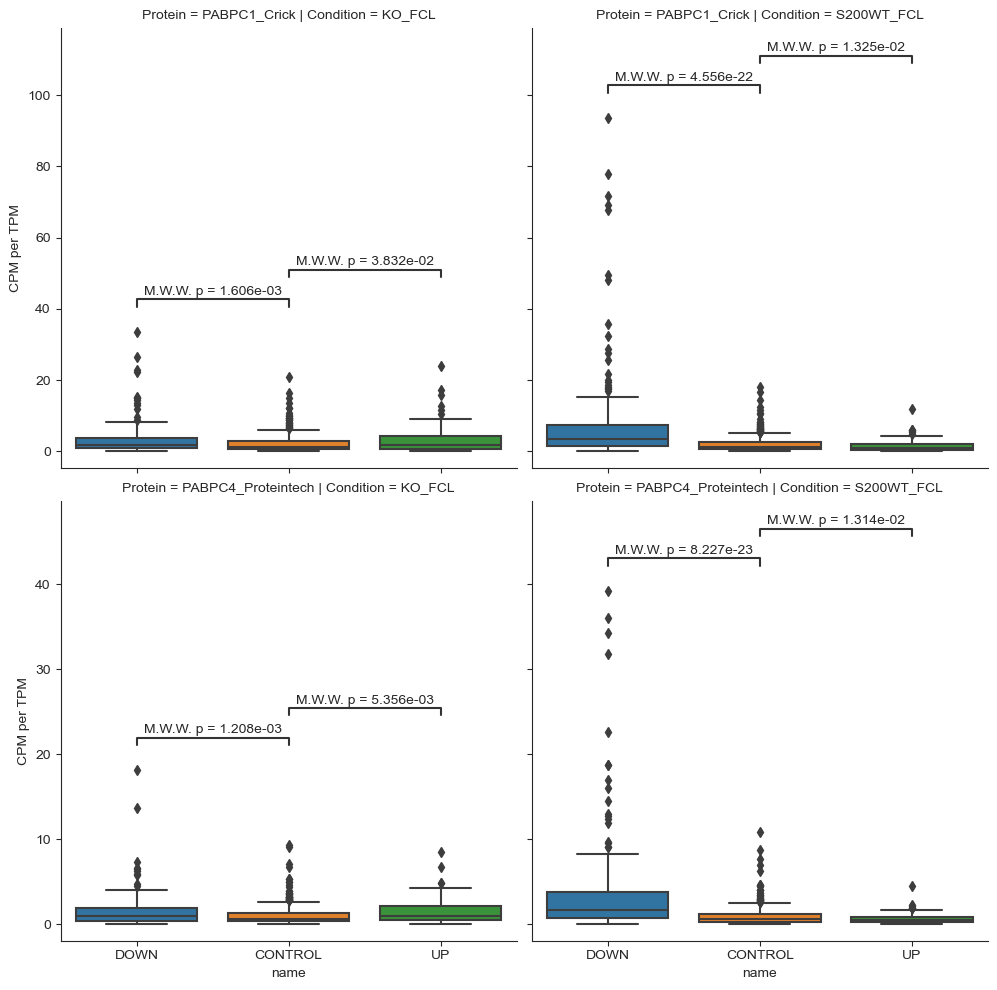

In [25]:
# Plot PABPCs
sns.set_style('white')
dfPlot = DfCombined.loc[(DfCombined.Protein.isin(['PABPC1_Crick', 'PABPC4_Proteintech'])) & (DfCombined.Location == '300nts upstream of polyA site')]
g = sns.catplot(
    kind='box', data=dfPlot, y='CPM per TPM', x='name', order=['DOWN', 'CONTROL', 'UP'],
    col='Condition', row='Protein', col_order=['KO_FCL', 'S200WT_FCL'], sharey='row',
    )
for ax in g.fig.axes:
    ax.tick_params(bottom=True, left=True)

pairs = [('DOWN', 'CONTROL'), ('CONTROL', 'UP')]

for id, ax in g.axes_dict.items():
    print(id)
    # subset the table otherwise the stats were calculated on the whole dataset
    annot = Annotator(
        ax, pairs,data=dfPlot.loc[(dfPlot['Protein']==id[0]) & (dfPlot['Condition']==id[1]),:],
        x='name',  y='CPM per TPM', order=['DOWN', 'CONTROL', 'UP'],
        )
    annot.configure(test='Mann-Whitney', text_format='full', loc='inside')
    _, corrected_results = annot.apply_and_annotate()

g.figure.savefig(f'{outpath}/PABPC_abundance_300ntsUpstreamOf3PEnd.pdf', bbox_inches='tight')

('PABPC1_Crick', 'KO_FCL')
DOWN vs. CONTROL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.606e-03 U_stat=4.100e+04
CONTROL vs. UP: Mann-Whitney-Wilcoxon test two-sided, P_val:3.832e-02 U_stat=1.345e+04
('PABPC1_Crick', 'S200WT_FCL')
DOWN vs. CONTROL: Mann-Whitney-Wilcoxon test two-sided, P_val:4.556e-22 U_stat=5.286e+04
CONTROL vs. UP: Mann-Whitney-Wilcoxon test two-sided, P_val:1.325e-02 U_stat=1.846e+04
('PABPC4_Proteintech', 'KO_FCL')
DOWN vs. CONTROL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.208e-03 U_stat=4.115e+04
CONTROL vs. UP: Mann-Whitney-Wilcoxon test two-sided, P_val:5.356e-03 U_stat=1.266e+04
('PABPC4_Proteintech', 'S200WT_FCL')
DOWN vs. CONTROL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.227e-23 U_stat=5.318e+04
CONTROL vs. UP: Mann-Whitney-Wilcoxon test two-sided, P_val:1.314e-02 U_stat=1.846e+04


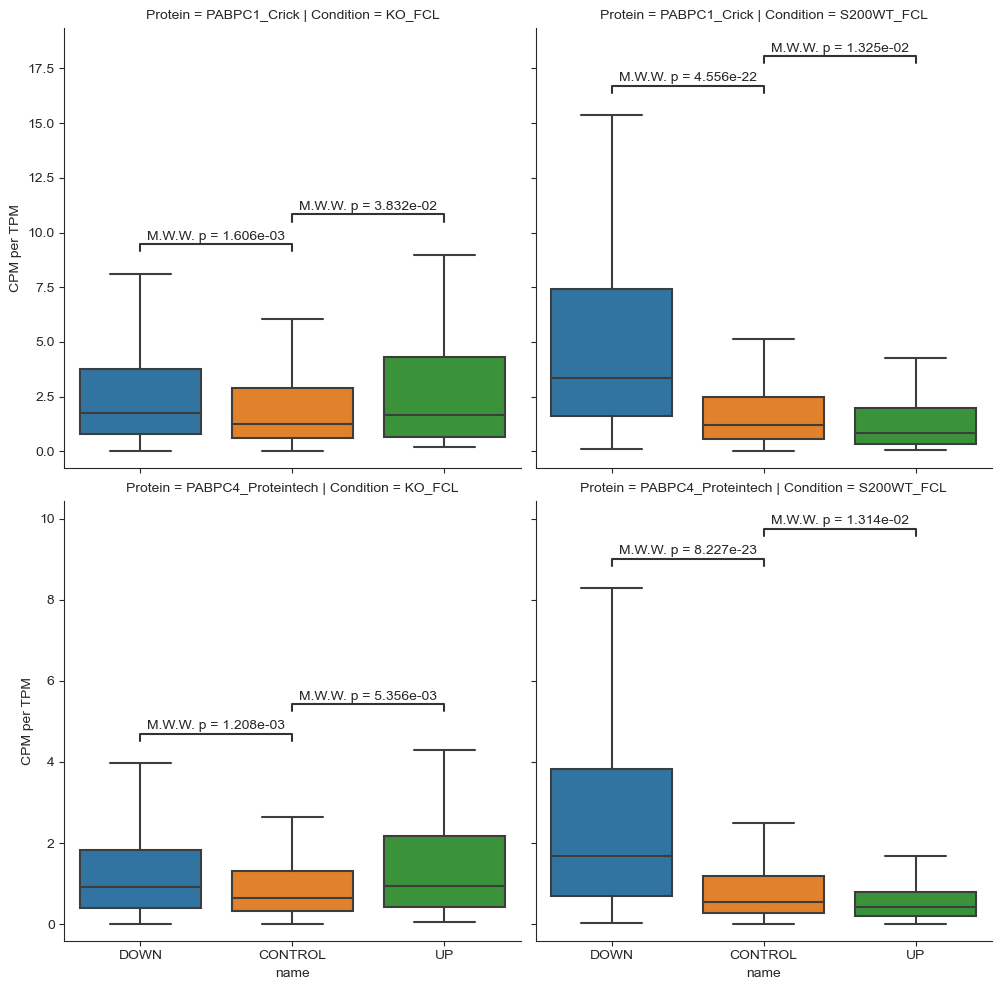

In [26]:
# Plot PABPCs
sns.set_style('white')
dfPlot = DfCombined.loc[(DfCombined.Protein.isin(['PABPC1_Crick', 'PABPC4_Proteintech'])) & (DfCombined.Location == '300nts upstream of polyA site')]
g = sns.catplot(
    kind='box', data=dfPlot, y='CPM per TPM', x='name', order=['DOWN', 'CONTROL', 'UP'],
    col='Condition', row='Protein', col_order=['KO_FCL', 'S200WT_FCL'], sharey='row', showfliers=False
    )
for ax in g.fig.axes:
    ax.tick_params(bottom=True, left=True)

pairs = [('DOWN', 'CONTROL'), ('CONTROL', 'UP')]

for id, ax in g.axes_dict.items():
    print(id)
    # subset the table otherwise the stats were calculated on the whole dataset
    annot = Annotator(
        ax, pairs,data=dfPlot.loc[(dfPlot['Protein']==id[0]) & (dfPlot['Condition']==id[1]),:],
        x='name',  y='CPM per TPM', order=['DOWN', 'CONTROL', 'UP'],
        )
    annot.configure(test='Mann-Whitney', text_format='full', loc='inside')
    _, corrected_results = annot.apply_and_annotate()

g.figure.savefig(f'{outpath}/PABPC_abundance_300ntsUpstreamOf3PEnd_nofliers.pdf', bbox_inches='tight')

In [27]:
# select regions for which we have both quantified end and starts
dfCommon = DfCombined.groupby(['chrom', 'name', 'strand', 'stable_gene_id', 'Sample']).count()['Location'].reset_index()
dfCommon = dfCommon.loc[dfCommon.Location == 2].drop(columns=['Location'])
dfCommon = dfCommon.merge(DfCombined, on=['chrom', 'name', 'strand', 'stable_gene_id', 'Sample'], how='left')
dfCommon.head()

,chrom,name,strand,stable_gene_id,Sample,start,end,minXlCount,CPM,librarysize,Protein,Condition,Mean TPM,CPM per TPM,gene_name,normalizationCoefficient,Location
0,chr1,CONTROL,+,ENSMUSG00000008475,DOX_C1_Crick_merged,152650070,152650371,15,11.9607,31436384,PABPC1_Crick,S200WT_FCL,13.779284,0.868020,Arpc5,0.002309,300nts downstream of stop codon
1,chr1,CONTROL,+,ENSMUSG00000008475,DOX_C1_Crick_merged,152651047,152651348,5,30.2834,31436384,PABPC1_Crick,S200WT_FCL,13.779284,2.197748,Arpc5,0.002309,300nts upstream of polyA site
2,chr1,CONTROL,+,ENSMUSG00000008475,DOX_C4_Proteintech_merged,152650070,152650371,15,5.6454,13462239,PABPC4_Proteintech,S200WT_FCL,13.779284,0.409702,Arpc5,0.005391,300nts downstream of stop codon
3,chr1,CONTROL,+,ENSMUSG00000008475,DOX_C4_Proteintech_merged,152651047,152651348,5,12.7765,13462239,PABPC4_Proteintech,S200WT_FCL,13.779284,0.927225,Arpc5,0.005391,300nts upstream of polyA site
4,chr1,CONTROL,+,ENSMUSG00000008475,KO_C1_Crick_merged,152650070,152650371,15,9.0517,28613449,PABPC1_Crick,KO_FCL,16.167586,0.559867,Arpc5,0.002162,300nts downstream of stop codon


In [28]:
dfCommon.groupby(['Location', 'Sample', 'name']).count()['chrom']

Location                         Sample                                            name   
300nts downstream of stop codon  DOX_C1_Crick_merged                               CONTROL    284
                                                                                   DOWN       150
                                                                                   UP          46
                                 DOX_C4_Proteintech_merged                         CONTROL    284
                                                                                   DOWN       150
                                                                                   UP          46
                                 KO_C1_Crick_merged                                CONTROL    284
                                                                                   DOWN       150
                                                                                   UP          46
                           

### Compute a log2(fold-change)

In [29]:
idx = ['chrom', 'name', 'strand', 'stable_gene_id', 'start', 'end', 'Location']
dfFoldChanges = pd.DataFrame()
i=0
for p, df in dfCommon.groupby('Protein'):
    print(p)
    # for each gene get CPM per TPM in each condition
    df = df.pivot_table(index=idx, columns='Condition', values='CPM per TPM')
    print(df.shape)
    if p == 'LIN28A':
        dfFoldChanges[f'{p} | S200WT_FCL vs S200WT_2iL'] = (df.S200WT_FCL / df.S200WT_2iL).apply(lambda x: np.log2(x))
        dfFoldChanges[f'{p} | S200A_FCL vs S200WT_2iL'] = (df.S200A_FCL / df.S200WT_2iL).apply(lambda x: np.log2(x))
    elif p == 'PABPC1_Crick':
        dfFoldChanges[f'{p} | S200WT_FCL vs KO_FCL'] = (df.S200WT_FCL / df.KO_FCL).apply(lambda x: np.log2(x))
        print(df.shape)
    elif p == 'PABPC4_Proteintech':
        dfFoldChanges[f'{p} | S200WT_FCL vs KO_FCL'] = (df.S200WT_FCL / df.KO_FCL).apply(lambda x: np.log2(x))
        print(df.shape)
    else:
        pass
dfFoldChanges = dfFoldChanges.reset_index()
dfFoldChanges = dfFoldChanges.melt(id_vars=idx, value_name='log2FC (CPM per TPM)', var_name='Comparison')


LIN28A
(950, 3)
PABPC1_Crick
(950, 2)
(950, 2)
PABPC4_Proteintech
(950, 2)
(950, 2)


In [32]:
# Save source data
dfFoldChanges.to_csv('../../results/SourceData/raw_saved/CPM_per_TPM_log2FC_3utrStartsEnds.csv', index=False)

In [30]:
sorted(dfFoldChanges.Comparison.unique())

['LIN28A | S200A_FCL vs S200WT_2iL',
 'LIN28A | S200WT_FCL vs S200WT_2iL',
 'PABPC1_Crick | S200WT_FCL vs KO_FCL',
 'PABPC4_Proteintech | S200WT_FCL vs KO_FCL']

In [14]:
for i, df in dfFoldChanges.groupby('name'):
    df = df.loc[df.Comparison == 'PABPC4_Proteintech | S200WT_FCL vs KO_FCL'].sort_values(by='log2FC (CPM per TPM)')
    print(df.head())

      chrom     name strand      stable_gene_id      start        end  \
2980  chr11  CONTROL      +  ENSMUSG00000038366   97727068   97727369   
2930  chr10  CONTROL      -  ENSMUSG00000025364  128393634  128393935   
3359   chr3  CONTROL      +  ENSMUSG00000074637   34706309   34706610   
3354   chr3  CONTROL      +  ENSMUSG00000041220  129427136  129427437   
3358   chr3  CONTROL      +  ENSMUSG00000074637   34705521   34705822   

                             Location  \
2980  300nts downstream of stop codon   
2930    300nts upstream of polyA site   
3359    300nts upstream of polyA site   
3354  300nts downstream of stop codon   
3358  300nts downstream of stop codon   

                                     Comparison  log2FC (CPM per TPM)  
2980  PABPC4_Proteintech | S200WT_FCL vs KO_FCL             -2.549087  
2930  PABPC4_Proteintech | S200WT_FCL vs KO_FCL             -2.518279  
3359  PABPC4_Proteintech | S200WT_FCL vs KO_FCL             -2.444553  
3354  PABPC4_Proteintech |

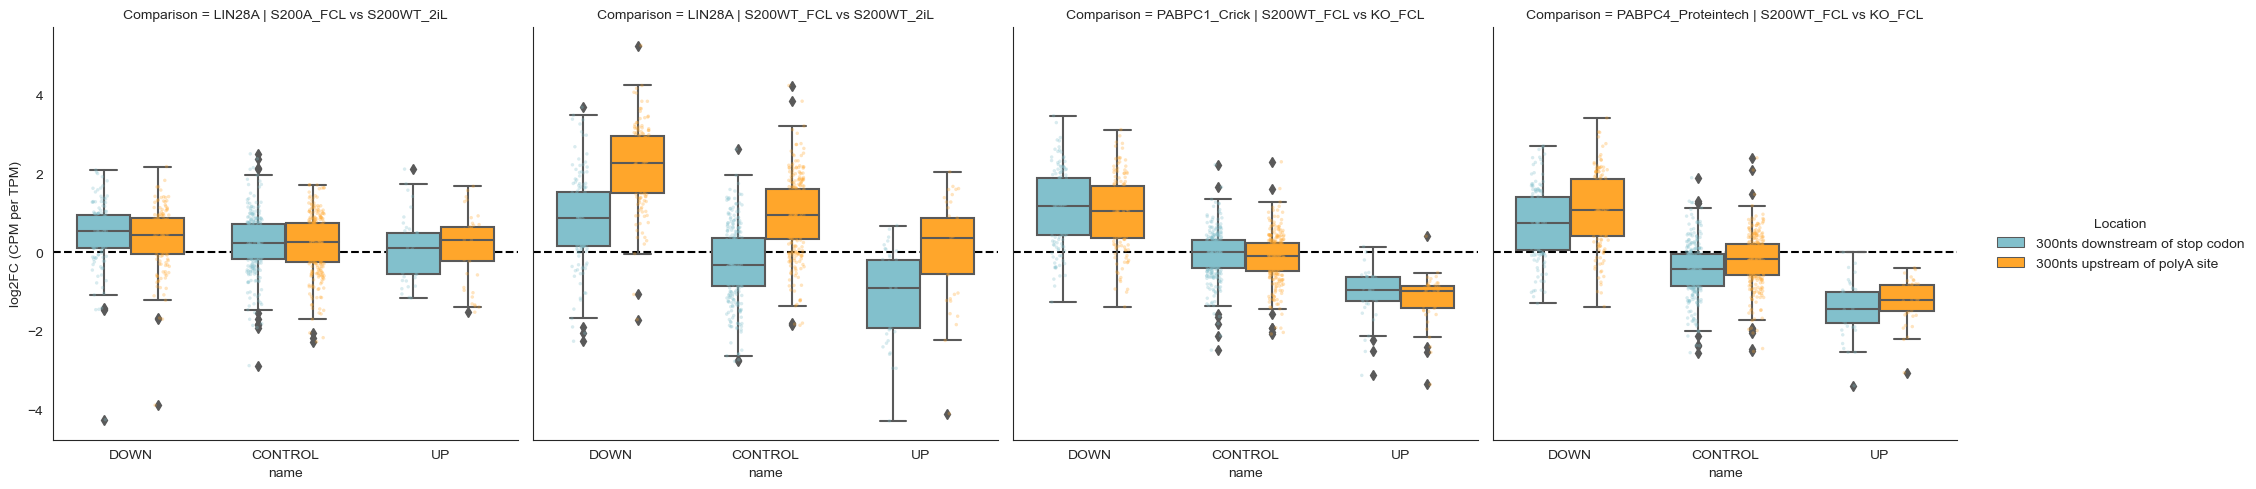

In [15]:
g = sns.catplot(
    data = dfFoldChanges, x='name', y='log2FC (CPM per TPM)', hue='Location', col='Comparison', kind='box', width=.7,
    order=['DOWN', 'CONTROL', 'UP'], col_order=sorted(dfFoldChanges.Comparison.unique()), palette=['#82c0cc', '#ffa62b'], saturation=1
)
g.map_dataframe(sns.stripplot, x='name', y='log2FC (CPM per TPM)', hue='Location', order=['DOWN', 'CONTROL', 'UP'], palette=['#82c0cc', '#ffa62b'], marker='.', dodge=True, alpha=0.3)

for ax in g.fig.axes:
    ax.axhline(0, ls='dashed', c='black', zorder=0)
g.fig.savefig(f'{outpath}/Boxplot_log2FC_allComparisons.pdf')

[(('DOWN', '300nts downstream of stop codon'), ('CONTROL', '300nts downstream of stop codon')), (('CONTROL', '300nts downstream of stop codon'), ('UP', '300nts downstream of stop codon')), (('DOWN', '300nts upstream of polyA site'), ('CONTROL', '300nts upstream of polyA site')), (('CONTROL', '300nts upstream of polyA site'), ('UP', '300nts upstream of polyA site'))]
LIN28A | S200A_FCL vs S200WT_2iL
DOWN_300nts downstream of stop codon vs. CONTROL_300nts downstream of stop codon: Mann-Whitney-Wilcoxon test two-sided, P_val:4.576e-05 U_stat=2.571e+04
CONTROL_300nts downstream of stop codon vs. UP_300nts downstream of stop codon: Mann-Whitney-Wilcoxon test two-sided, P_val:9.410e-02 U_stat=7.383e+03
DOWN_300nts upstream of polyA site vs. CONTROL_300nts upstream of polyA site: Mann-Whitney-Wilcoxon test two-sided, P_val:3.216e-02 U_stat=2.335e+04
CONTROL_300nts upstream of polyA site vs. UP_300nts upstream of polyA site: Mann-Whitney-Wilcoxon test two-sided, P_val:6.016e-01 U_stat=6.700e+0

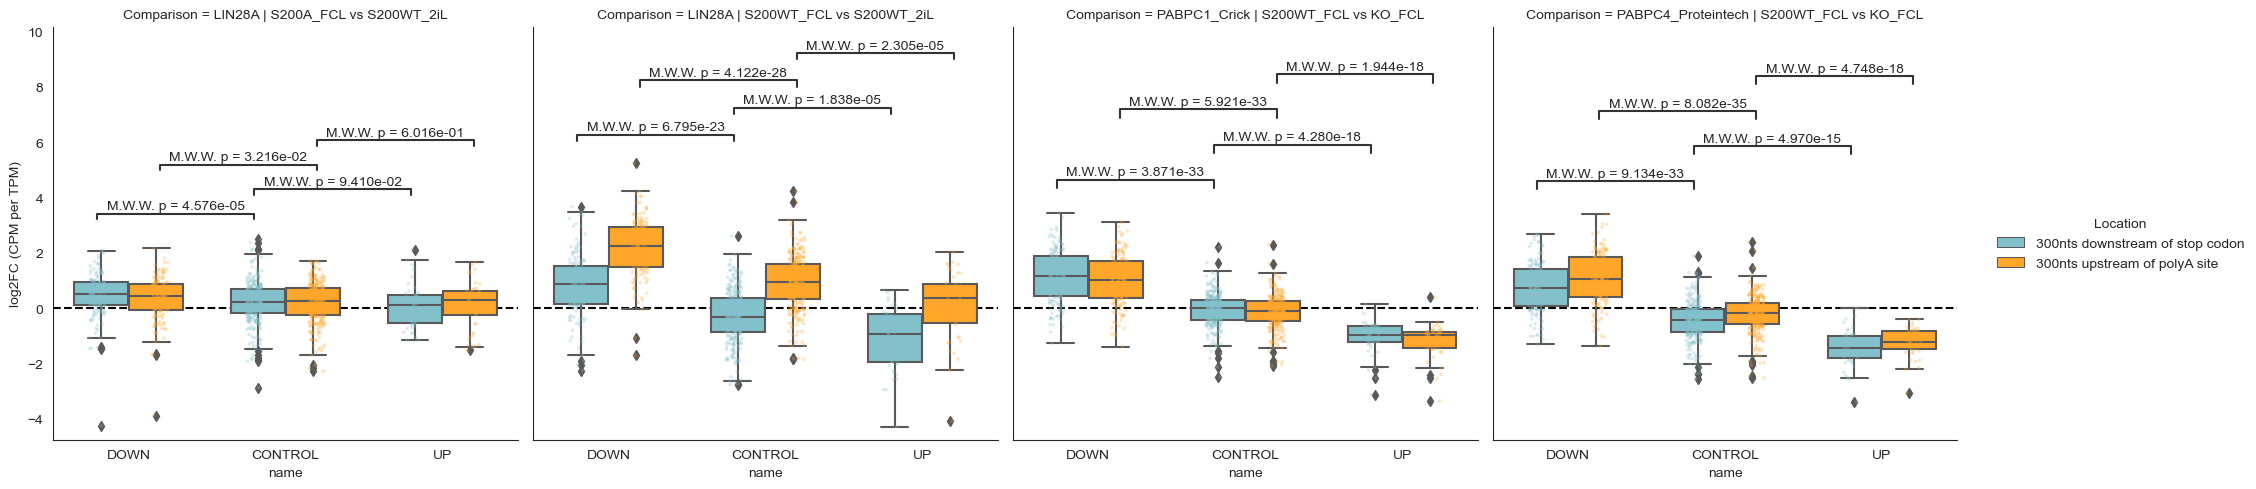

In [16]:
hue_order = sorted(dfFoldChanges.Location.unique())
order=['DOWN', 'CONTROL', 'UP']

g = sns.catplot(
    data = dfFoldChanges, x='name', y='log2FC (CPM per TPM)', hue='Location', col='Comparison', kind='box', width=.7,
    order=order, col_order=sorted(dfFoldChanges.Comparison.unique()), palette=['#82c0cc', '#ffa62b'], saturation=1,
    hue_order=hue_order
)
g.map_dataframe(
    sns.stripplot, x='name', y='log2FC (CPM per TPM)', hue='Location', order=order,
    palette=['#82c0cc', '#ffa62b'], marker='.', dodge=True, alpha=0.3, hue_order=hue_order
)

for ax in g.fig.axes:
    ax.axhline(0, ls='dashed', c='black', zorder=0)

pairs = []
for y in hue_order:
    pairs.append((('DOWN', y),('CONTROL', y)))
    pairs.append((('CONTROL', y),('UP', y)))


print(pairs)

for id, ax in g.axes_dict.items():
    print(id)
# subset the table otherwise the stats were calculated on the whole dataset
    annot = Annotator(
        ax, pairs,data=dfFoldChanges.loc[dfFoldChanges['Comparison']==id,:], x='name',  y='log2FC (CPM per TPM)', hue='Location', order=order, hue_order=hue_order
        )
    annot.configure(test='Mann-Whitney', text_format='full', loc='inside')
    _, corrected_results = annot.apply_and_annotate()

g.fig.savefig(f'{outpath}/Boxplot_log2FC_allComparisons_withStatTest.pdf')

[(('DOWN', '300nts downstream of stop codon'), ('CONTROL', '300nts downstream of stop codon')), (('CONTROL', '300nts downstream of stop codon'), ('UP', '300nts downstream of stop codon')), (('DOWN', '300nts upstream of polyA site'), ('CONTROL', '300nts upstream of polyA site')), (('CONTROL', '300nts upstream of polyA site'), ('UP', '300nts upstream of polyA site'))]
LIN28A | S200A_FCL vs S200WT_2iL
DOWN_300nts downstream of stop codon vs. CONTROL_300nts downstream of stop codon: Mann-Whitney-Wilcoxon test two-sided, P_val:4.576e-05 U_stat=2.571e+04
CONTROL_300nts downstream of stop codon vs. UP_300nts downstream of stop codon: Mann-Whitney-Wilcoxon test two-sided, P_val:9.410e-02 U_stat=7.383e+03
DOWN_300nts upstream of polyA site vs. CONTROL_300nts upstream of polyA site: Mann-Whitney-Wilcoxon test two-sided, P_val:3.216e-02 U_stat=2.335e+04
CONTROL_300nts upstream of polyA site vs. UP_300nts upstream of polyA site: Mann-Whitney-Wilcoxon test two-sided, P_val:6.016e-01 U_stat=6.700e+0

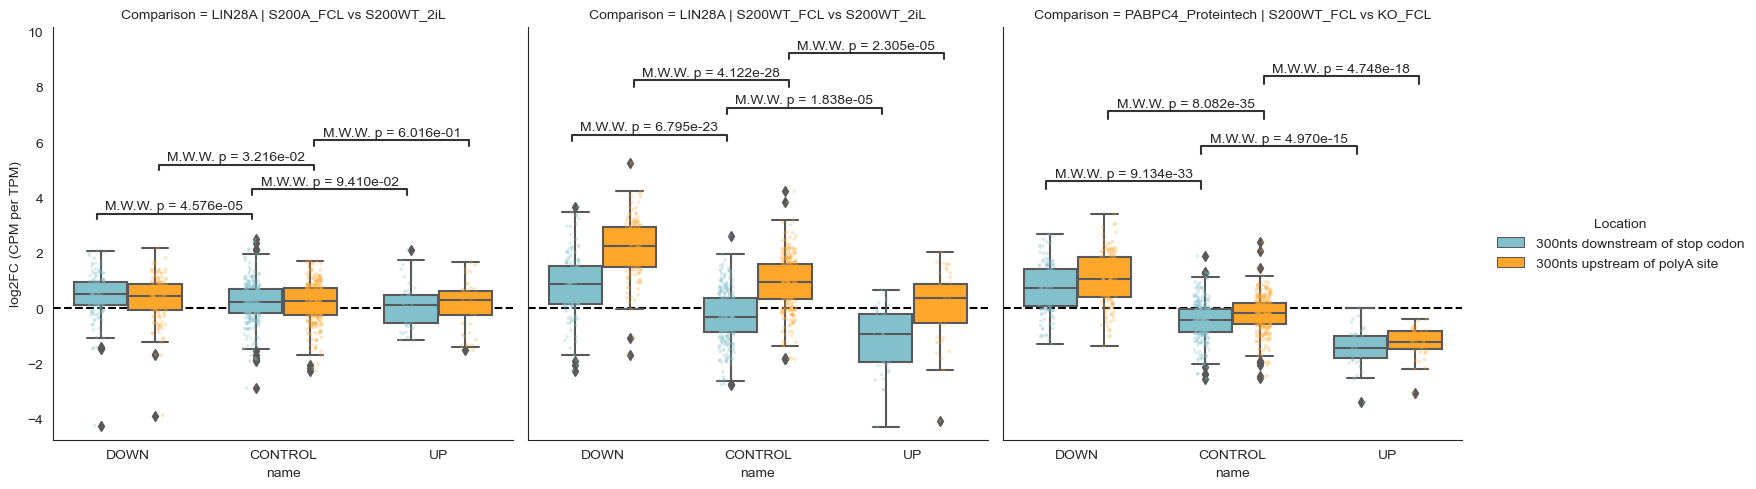

In [17]:
dfPlot = dfFoldChanges.loc[dfFoldChanges.Comparison != 'PABPC1_Crick | S200WT_FCL vs KO_FCL']
g = sns.catplot(
    data = dfPlot, x='name', y='log2FC (CPM per TPM)', hue='Location', col='Comparison', kind='box', width=.7,
    order=['DOWN', 'CONTROL', 'UP'], col_order=sorted(dfPlot.Comparison.unique()), palette=['#82c0cc', '#ffa62b'], saturation=1
)
g.map_dataframe(sns.stripplot, x='name', y='log2FC (CPM per TPM)', hue='Location', order=['DOWN', 'CONTROL', 'UP'], palette=['#82c0cc', '#ffa62b'], marker='.', dodge=True, alpha=0.3)

for ax in g.fig.axes:
    ax.axhline(0, ls='dashed', c='black', zorder=0)

pairs = []
for y in hue_order:
    pairs.append((('DOWN', y),('CONTROL', y)))
    pairs.append((('CONTROL', y),('UP', y)))


print(pairs)

for id, ax in g.axes_dict.items():
    print(id)
# subset the table otherwise the stats were calculated on the whole dataset
    annot = Annotator(
        ax, pairs,data=dfFoldChanges.loc[dfFoldChanges['Comparison']==id,:], x='name',  y='log2FC (CPM per TPM)', hue='Location', order=order, hue_order=hue_order
        )
    annot.configure(test='Mann-Whitney', text_format='full', loc='inside')
    _, corrected_results = annot.apply_and_annotate()

g.fig.savefig(f'{outpath}/Boxplot_log2FC_Lin28A_Pabpc4_withStatTest.pdf')